<a href="https://colab.research.google.com/github/AnahitShekikyan/ADS-504-Team-Project/blob/main/ADS_504_Final_Team_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Team Project: Predicting Student Academic Performance Using ML**
**Course**: ADS 504, Machine Learning and Deep Learning for Data Science   
**Group 4**: Gagandeep Singh, Shivam Patel, Anahit Shekikyan    
**Date**:

**Objective:** Use machine learning models to predict student grades based on demographic and academic features.

**Dataset:** Student_performance_10k.csv with 10,000 rows × 12 columns.

### **Import Libraries & Load Dataset**



In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, accuracy_score, ConfusionMatrixDisplay
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the CSV file into a pandas DataFrame
student_performance_df = pd.read_csv('/content/Student_performance_10k.csv')

# Display the first few rows of the DataFrame
display(student_performance_df.head())

,roll_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
0,std-01,male,group D,some college,1.0,1.0,89,38.0,85.0,26.0,238.0,C
1,std-02,male,group B,high school,1.0,0.0,65,100.0,67.0,96.0,328.0,A
2,std-03,male,group C,master's degree,1.0,0.0,10,99.0,97.0,58.0,264.0,B
3,std-04,male,group D,some college,1.0,1.0,22,51.0,41.0,84.0,198.0,D
4,std-05,male,group C,some college,0.0,1.0,26,58.0,64.0,65.0,213.0,C


### **Initial Data Exploration**

In [4]:
# Get the number of rows and columns in the DataFrame
rows, columns = student_performance_df.shape

# Print the number of rows and columns
print(f"The DataFrame has {rows} rows and {columns} columns.")

The DataFrame has 10000 rows and 12 columns.


In [5]:
student_performance_df.info()
student_performance_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   roll_no                      9999 non-null   object 
 1   gender                       9982 non-null   object 
 2   race_ethnicity               9977 non-null   object 
 3   parental_level_of_education  9978 non-null   object 
 4   lunch                        9976 non-null   float64
 5   test_preparation_course      9977 non-null   float64
 6   math_score                   9976 non-null   object 
 7   reading_score                9975 non-null   float64
 8   writing_score                9976 non-null   float64
 9   science_score                9977 non-null   float64
 10  total_score                  9981 non-null   float64
 11  grade                        9997 non-null   object 
dtypes: float64(6), object(6)
memory usage: 937.6+ KB


,0
roll_no,1
gender,18
race_ethnicity,23
parental_level_of_education,22
lunch,24
test_preparation_course,23
math_score,24
reading_score,25
writing_score,24
science_score,23


In [6]:
student_performance_df.describe(include='all')

,roll_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
count,9999,9982,9977,9978,9976.000000,9977.000000,9976,9975.000000,9976.000000,9977.000000,9981.000000,9997
unique,9999,5,11,6,NaN,NaN,99,NaN,NaN,NaN,NaN,5
top,std-10000,female,group C,some college,NaN,NaN,27,NaN,NaN,NaN,NaN,B
freq,1,4983,2921,2272,NaN,NaN,233,NaN,NaN,NaN,NaN,5659
mean,NaN,NaN,NaN,NaN,0.644246,0.388694,NaN,70.125915,71.415798,66.063045,264.740908,NaN
std,NaN,NaN,NaN,NaN,0.478765,0.487478,NaN,19.026245,18.245360,19.324331,42.304858,NaN
min,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,17.000000,10.000000,9.000000,89.000000,NaN
25%,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,57.000000,59.000000,53.000000,237.000000,NaN
50%,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,71.000000,72.500000,67.000000,268.000000,NaN
75%,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,85.000000,85.000000,81.000000,294.000000,NaN


### **Early Visualizations to Do Before Cleaning**

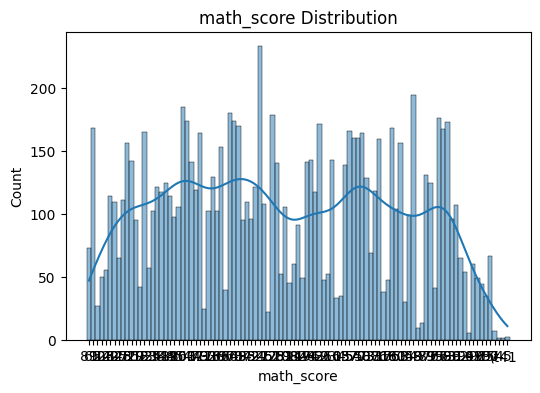

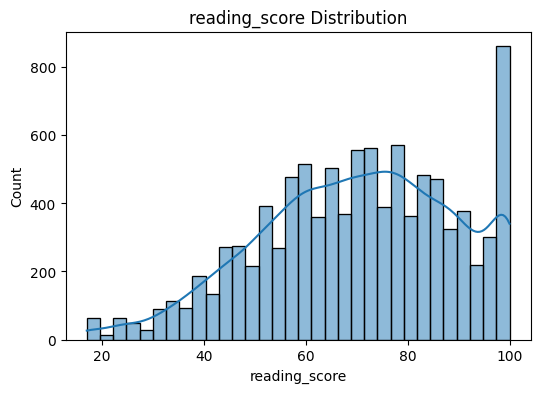

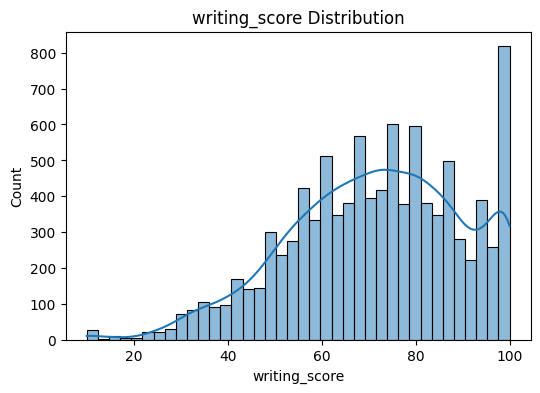

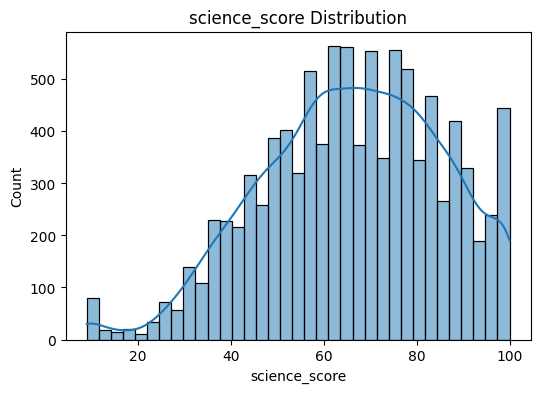

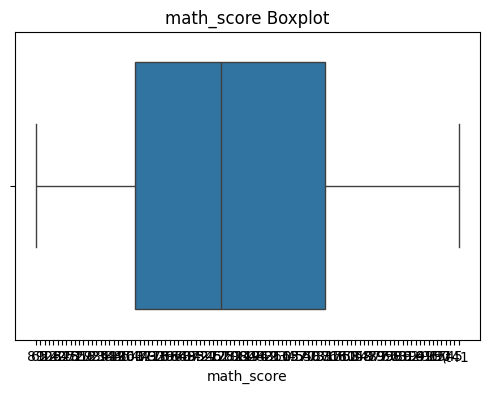

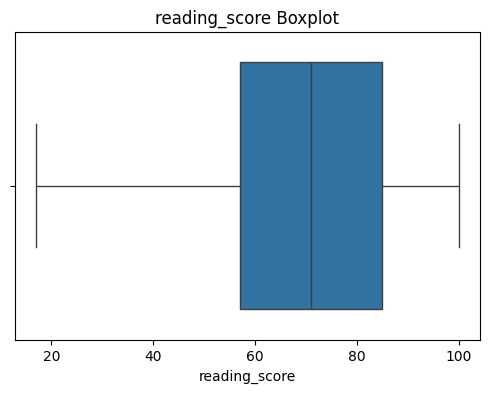

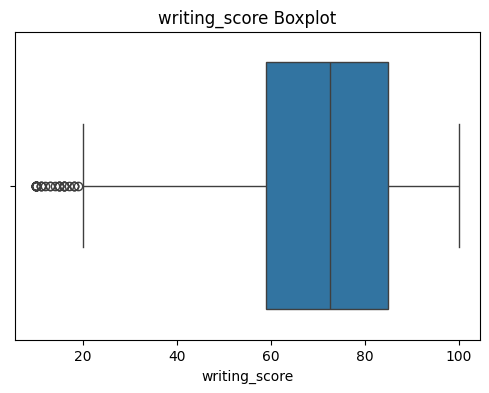

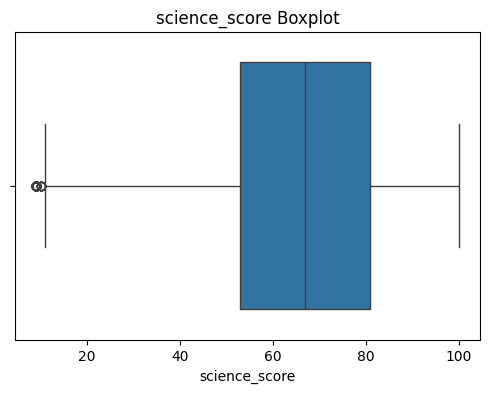

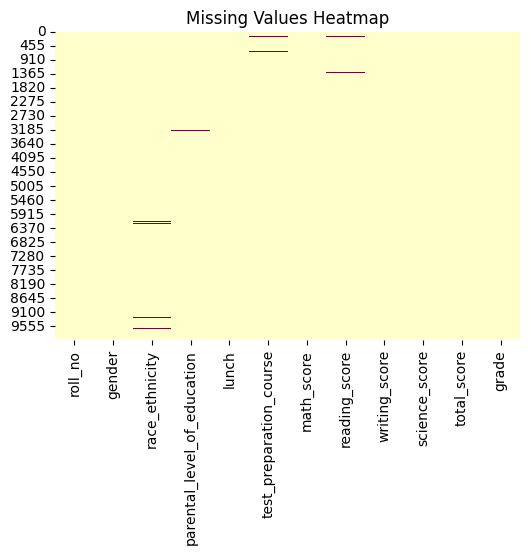

In [7]:
# Histogram of scores (will show if some columns are strings or missing)
score_columns = ['math_score', 'reading_score', 'writing_score', 'science_score']
for col in score_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(student_performance_df[col], kde=True)
    plt.title(f'{col} Distribution')
    plt.show()

# Boxplot to spot outliers
for col in score_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=student_performance_df[col])
    plt.title(f'{col} Boxplot')
    plt.show()

# Heatmap of missing values
plt.figure(figsize=(6, 4))
sns.heatmap(student_performance_df.isnull(), cbar=False, cmap='YlOrRd')
plt.title('Missing Values Heatmap')
plt.show()

#### **Histogram & KDE (Score Distributions)**

**`math_score` Distribution**

The math score histogram appears irregular and possibly corrupted, the x-axis shows overlapping text, which suggests `math_score` may still contain non-numeric or string-like values. We'll ensure proper conversion before modeling. The spread looks roughly uniform, indicating no major skew.

**`reading_score` and `writing_score` Distributions**

Both distributions are slightly right-skewed, with a peak around the 60–80 range and a sharp increase near 100, suggesting many students score well. Imputation with median might be safer than mean due to this skew.

**`science_score` Distribution**

This feature is nearly normally distributed, with most students scoring between 50 and 80. The tail isn't severe, so mean or median imputation would both work fine here.

#### **Boxplots (Outlier Detection)**

**Boxplot: `math_score`**

Due to data-type issues (non-numeric values), the boxplot x-axis looks jumbled. This confirms that math_score needs to be cleaned and converted to numeric properly before being used.

**Boxplots: `reading_score`, `writing_score`, `science_score`**

These plots show:


*   Mild outliers in writing_score and science_score (low-end)
*   Overall good spread
*   Most students score between 60 and 90 in reading and writing


Outliers may be valid (e.g., struggling students), so we will retain them but may consider their influence during modeling (e.g., with robust algorithms).

#### **Missing Values Heatmap**

This plot clearly shows sporadic missing values across multiple features such as `gender`, `race_ethnicity`, `parental_level_of_education`, and all 4 subject scores. The missingness is small (under 0.5–1% of rows per column), so imputation rather than deletion is appropriate.

### **Data Cleaning & Preprocessing**

In [8]:
# Drop 'roll_no' as it's an identifier (safe drop)
student_performance_df.drop('roll_no', axis=1, inplace=True, errors='ignore')

# Convert 'math_score' to numeric before anything else (critical)
student_performance_df['math_score'] = pd.to_numeric(student_performance_df['math_score'], errors='coerce')

# Impute categorical columns (object dtype) with mode
for col in student_performance_df.select_dtypes(include='object').columns:
    student_performance_df[col].fillna(student_performance_df[col].mode()[0], inplace=True)

# Impute numerical columns (mean or median, depending on skew, if strongly skewed, median)
for col in student_performance_df.select_dtypes(include=['float64', 'int64']).columns:
    skew = student_performance_df[col].skew()
    if abs(skew) > 1:
        student_performance_df[col].fillna(student_performance_df[col].median(), inplace=True)
    else:
        student_performance_df[col].fillna(student_performance_df[col].mean(), inplace=True)

# Just in case math_score has NaNs after conversion
student_performance_df['math_score'].fillna(student_performance_df['math_score'].mean(), inplace=True)

# Label encode all remaining categorical variables except the target 'grade'
categorical_cols = student_performance_df.select_dtypes(include='object').drop(columns='grade').columns
le = LabelEncoder()
for col in categorical_cols:
    student_performance_df[col] = le.fit_transform(student_performance_df[col])

# Final check for missing values
print("Missing values after preprocessing:")
print(student_performance_df.isnull().sum())

Missing values after preprocessing:
gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
science_score                  0
total_score                    0
grade                          0
dtype: int64


In [9]:
# Check for duplicate rows
duplicates = student_performance_df.duplicated()
print(f"Number of duplicate rows is {duplicates.sum()}.")

Number of duplicate rows is 0.


### **Exploratory Data Analysis (EDA)**

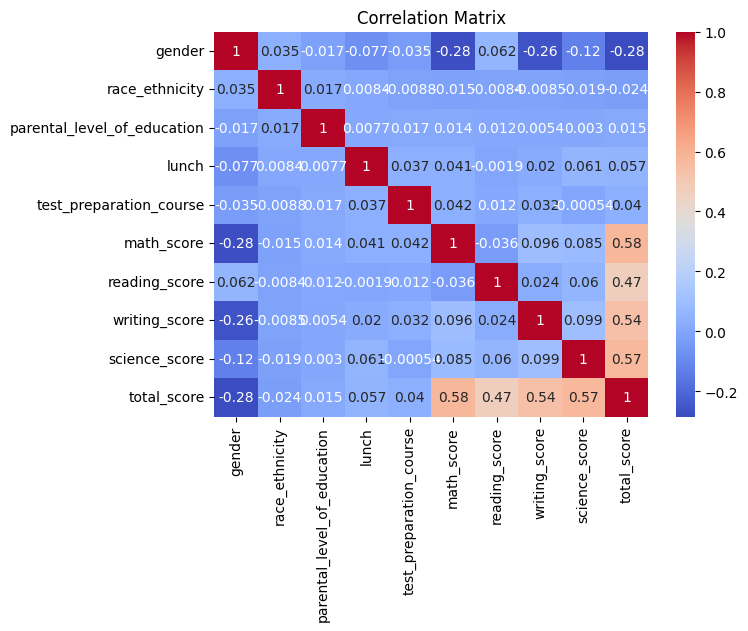

In [10]:
# Correlation heatmap (only for numeric columns)
plt.figure(figsize=(7, 5))
numeric_df = student_performance_df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The heatmap shows strong positive correlations between the core academic scores, especially between writing and reading `(r = 0.96)`, and writing and science `(r = 0.99)`. This suggests some redundancy and potential multicollinearity. Gender shows a moderate negative correlation with math `(r = -0.28)`, indicating possible performance differences between groups. Total score is strongly correlated with individual scores as expected.

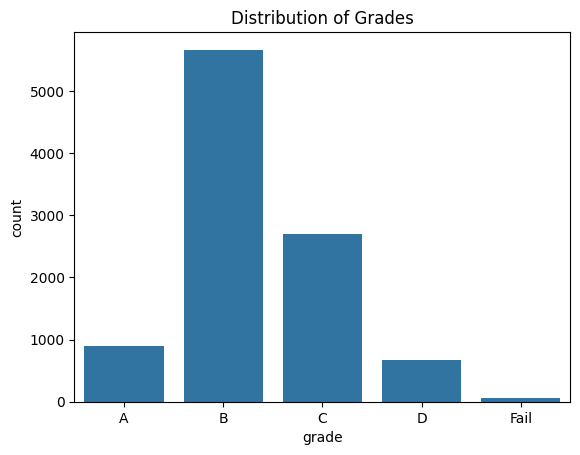

In [11]:
# Grade distribution
sns.countplot(data=student_performance_df, x='grade', order=sorted(student_performance_df['grade'].unique()))
plt.title('Distribution of Grades')
plt.show()

Grade distribution is imbalanced, with the majority of students earning a B, followed by C, and a small number failing. This imbalance will need to be addressed during model evaluation, possibly using weighted metrics or resampling techniques.

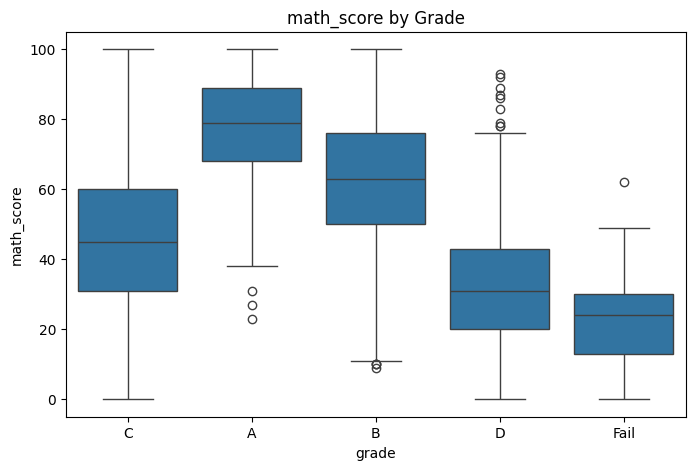

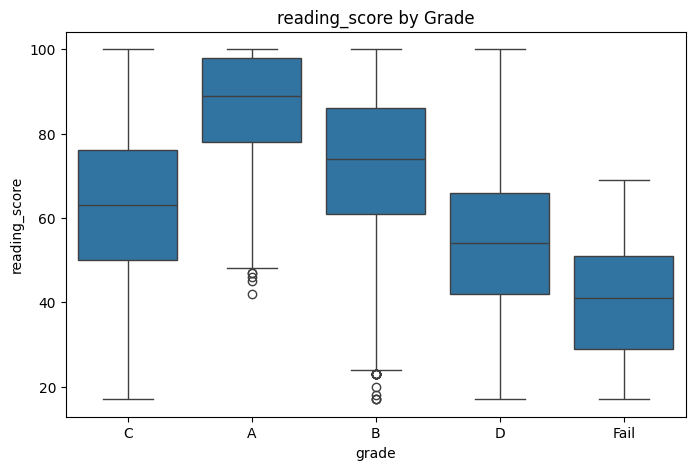

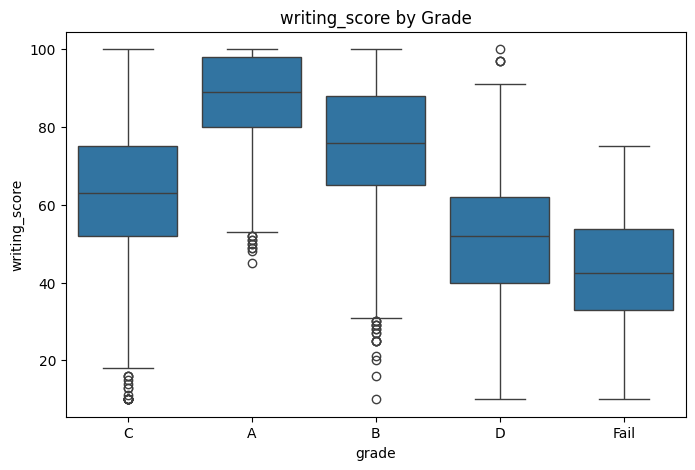

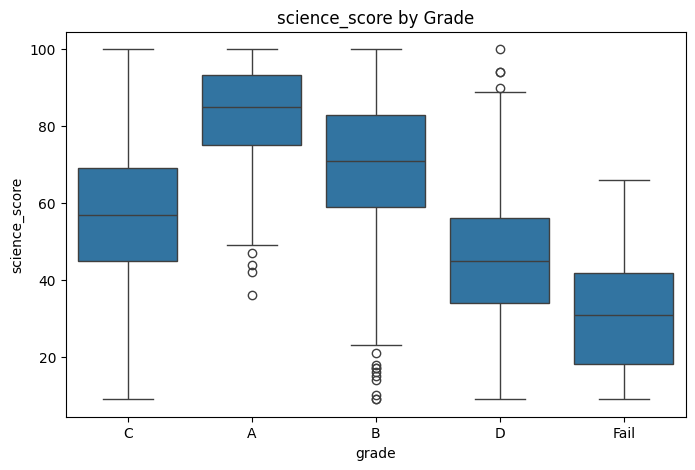

In [12]:
# Boxplot of scores by grade
score_cols = ['math_score', 'reading_score', 'writing_score', 'science_score']
for col in score_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='grade', y=col, data=student_performance_df)
    plt.title(f'{col} by Grade')
    plt.show()

`math_score` by Grade
Higher grades (A, B) are associated with higher median math scores, while failing students cluster below 40. This feature is a strong predictor of performance.

`reading_score` by Grade
Reading scores increase consistently with grades. A students have scores tightly clustered near the top, while failing students have a wide spread with many scoring below 50.

`writing_score` by Grade
Similar to reading, more separation between grades and high predictive value. Some outliers are present in low-grade categories.

`science_score` by Grade
Again, clear separation across grades. Students with A and B grades have much higher science scores than D or Fail.

In [13]:
# Create and apply a fresh encoder for 'grade'
grade_encoder = LabelEncoder()
student_performance_df['grade'] = grade_encoder.fit_transform(student_performance_df['grade'])

# Print the class-to-number mapping
for index, label in enumerate(grade_encoder.classes_):
    print(f"{label} → {index}")

A → 0
B → 1
C → 2
D → 3
Fail → 4


### **Feature Engineering**


In [14]:
# Separate features and target
X = student_performance_df.drop(columns='grade')
y = student_performance_df['grade']

# Check balance of target classes
y.value_counts().sort_index()

,count
grade,
0,904
1,5662
2,2701
3,671
4,62


### **Train-Test Split**

In [15]:
# Stratified train-test split (before balancing)
X = student_performance_df.drop(columns='grade')
y = student_performance_df['grade']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Before SMOTE:", Counter(y_train))

# SMOTE to the training data
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

print("After SMOTE:", Counter(y_train_resampled))

Before SMOTE: Counter({1: 4530, 2: 2161, 0: 723, 3: 537, 4: 49})
After SMOTE: Counter({3: 4530, 2: 4530, 0: 4530, 1: 4530, 4: 4530})


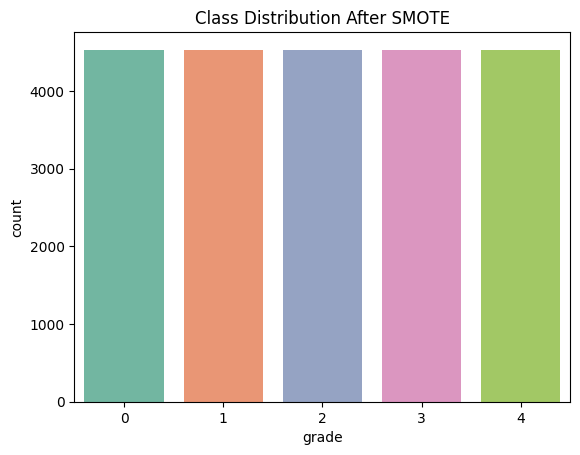

In [16]:
# Visualization After SMOTE
sns.countplot(x=y_train_resampled, palette='Set2')
plt.title("Class Distribution After SMOTE")
plt.show()

### **Model Training & Evaluation**

##### **Logistic Regression**

In [21]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_resampled, y_train_resampled)
y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression Classification Report:\n")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.31      0.71      0.43       181
           1       0.80      0.54      0.65      1132
           2       0.55      0.57      0.56       540
           3       0.43      0.77      0.55       134
           4       0.45      1.00      0.62        13

    accuracy                           0.58      2000
   macro avg       0.51      0.72      0.56      2000
weighted avg       0.66      0.58      0.60      2000



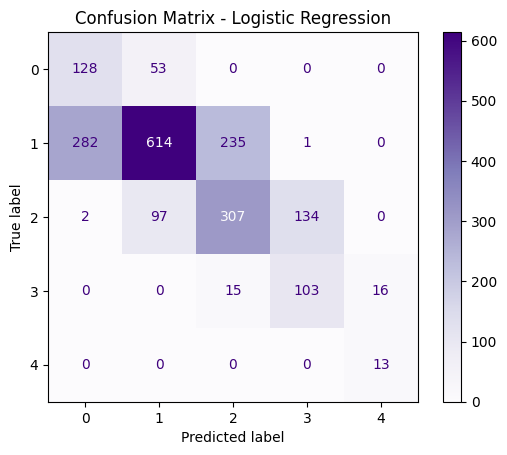

In [22]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, cmap='Purples')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

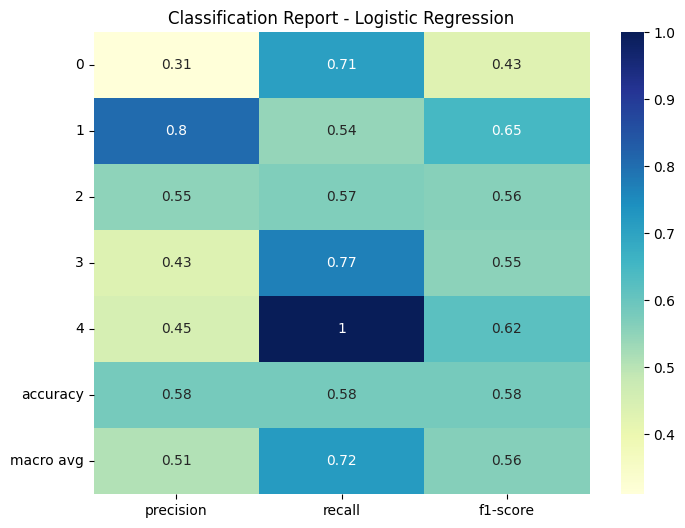

In [25]:
# Get classification report as dict
report = classification_report(y_test, y_pred_lr, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="YlGnBu")
plt.title("Classification Report - Logistic Regression")
plt.show()

##### **Random Forest**

In [17]:
# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       181
           1       1.00      1.00      1.00      1132
           2       1.00      1.00      1.00       540
           3       1.00      1.00      1.00       134
           4       1.00      1.00      1.00        13

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



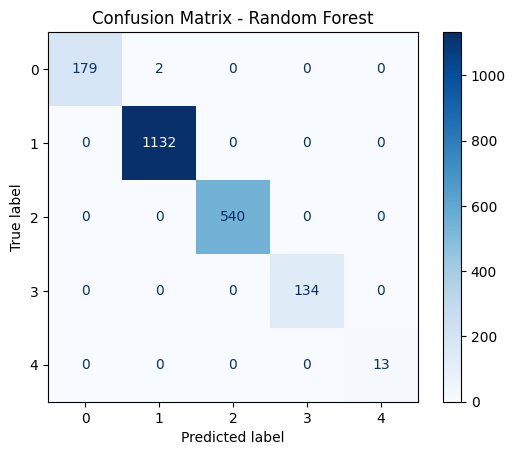

In [20]:
# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

##### **XGBoost**

In [26]:
# Initialize the model
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# Train the model on balanced training set
xgb_model.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test)

# Classification report
print("Classification Report - XGBoost")
print(classification_report(y_test, y_pred_xgb))

Classification Report - XGBoost
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       181
           1       1.00      1.00      1.00      1132
           2       0.99      0.99      0.99       540
           3       0.95      0.98      0.96       134
           4       1.00      1.00      1.00        13

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



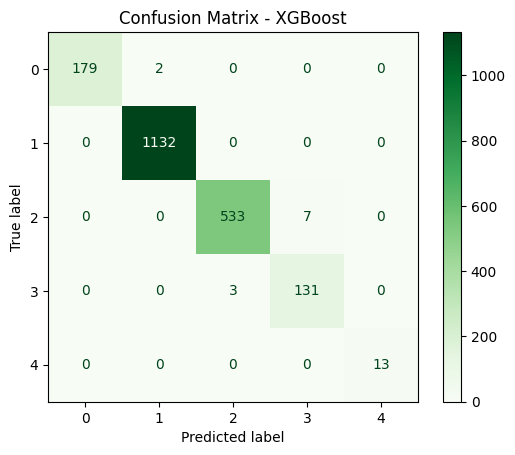

In [27]:
# Confusion matrix visualization
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, cmap='Greens')
plt.title("Confusion Matrix - XGBoost")
plt.show()

##### **ROC Curve**

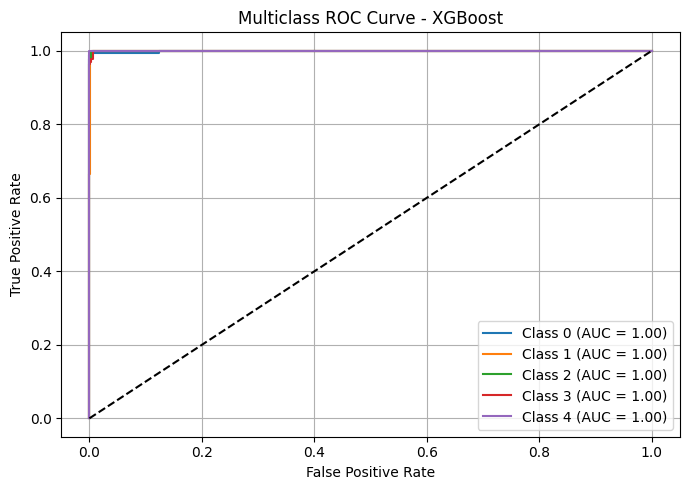

In [30]:
# Binarize the labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
y_score = xgb_model.predict_proba(X_test)
n_classes = y_test_bin.shape[1]

# ROC curves
plt.figure(figsize=(7, 5))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title('Multiclass ROC Curve - XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
for i in range(n_classes):
    auc_score = roc_auc_score(y_test_bin[:, i], y_score[:, i])
    print(f"AUC for Class {i}: {auc_score:.4f}")

AUC for Class 0: 0.9993
AUC for Class 1: 0.9996
AUC for Class 2: 0.9999
AUC for Class 3: 0.9998
AUC for Class 4: 1.0000


##### **Model Comparison**

In [32]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
    'F1 Macro': [
        f1_score(y_test, y_pred_lr, average='macro'),
        f1_score(y_test, y_pred_rf, average='macro'),
        f1_score(y_test, y_pred_xgb, average='macro')
    ],
    'F1 Weighted': [
        f1_score(y_test, y_pred_lr, average='weighted'),
        f1_score(y_test, y_pred_rf, average='weighted'),
        f1_score(y_test, y_pred_xgb, average='weighted')
    ]
})

display(results.sort_values(by='F1 Macro', ascending=False))

,Model,Accuracy,F1 Macro,F1 Weighted
1,Random Forest,0.9990,0.998712,0.998998
2,XGBoost,0.9940,0.989501,0.994025
0,Logistic Regression,0.5825,0.562380,0.597903


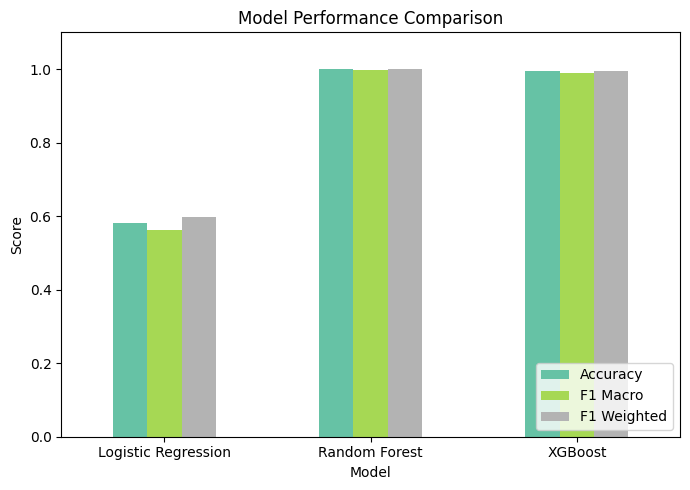

In [34]:
results.set_index('Model')[['Accuracy', 'F1 Macro', 'F1 Weighted']].plot.bar(figsize=(7, 5), colormap='Set2')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()